$$
\textbf{Please Don't use AI} \\ \textbf{Write the codes that you can explain to Dr. Eric}
$$

$$
\text{Use NumPy to create random temperature readings andcompute average.}
$$

In [1]:
import numpy as np

In [2]:
temps = np.random.randint(10,100,50)
temps

array([83, 81, 16, 25, 58, 68, 53, 14, 66, 39, 61, 52, 70, 26, 68, 82, 44,
       31, 88, 18, 44, 10, 37, 64, 97, 22, 17, 95, 90, 40, 27, 45, 17, 47,
       47, 70, 43, 45, 37, 14, 94, 44, 75, 28, 93, 75, 74, 56, 32, 65],
      dtype=int32)

In [3]:
print(f"We henerated {len(temps)} values of Temperature \nwith mean {np.mean(temps)}")

We henerated 50 values of Temperature 
with mean 51.74


In [4]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

$$
\text{Clean a CSV file with missing PM2.5 data using pandas.}
$$

In [5]:
data = pd.read_csv("Measurement_summary.csv")
data.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


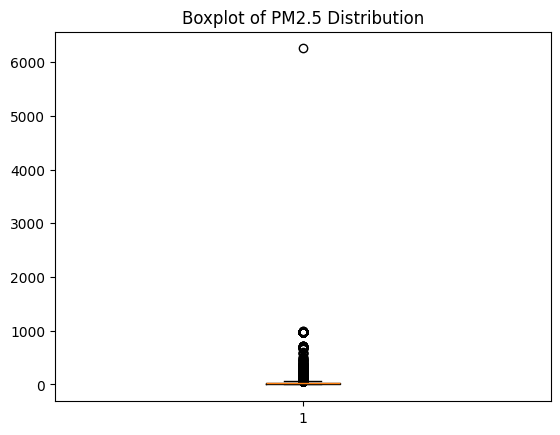

In [6]:
plt.boxplot(data["PM2.5"])
plt.title("Boxplot of PM2.5 Distribution")
plt.show()

In [7]:
#data = data[data["PM2.5"] != data["PM2.5"].min()]

In [8]:
#data = data[data["PM2.5"] != data["PM2.5"].max()]

In [9]:
data["PM2.5"].describe()

count    647511.000000
mean         25.411995
std          43.924595
min          -1.000000
25%          11.000000
50%          19.000000
75%          31.000000
max        6256.000000
Name: PM2.5, dtype: float64

In [10]:
data["PM2.5"][data["PM2.5"]==np.nan]

Series([], Name: PM2.5, dtype: float64)

In [11]:
data["PM2.5"].isna().sum()

np.int64(0)

In [12]:
q1 = np.quantile(data["PM2.5"],q=0.25)
q3 = np.quantile(data["PM2.5"],q=0.75)
iqr = q3-q1
low_bd = q1 - 1.5*iqr
high_bd = q3 + 1.5*iqr

In [13]:
data["Outlier"] = data["PM2.5"] > (high_bd or data["PM2.5"] < low_bd)

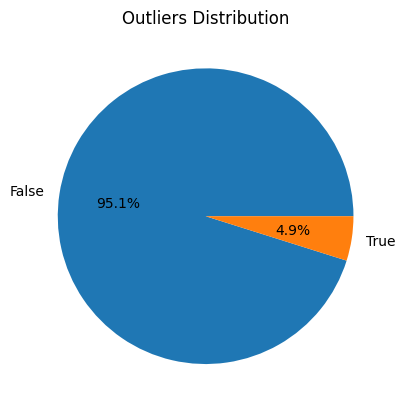

In [14]:
data["Outlier"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")
plt.title("Outliers Distribution")
plt.ylabel("")
plt.show()

In [15]:
data["PM2.5"][data["Outlier"] == True] = np.nan

C:\Users\branc\AppData\Local\Temp\ipykernel_12568\2909546346.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["PM2.5"][data["Outlier"] == True] = np.nan
C:\Users\branc\AppData\Local\Temp\ipykernel_12568\2909546346.py:1: SettingWithCo

In [16]:
data["PM2.5"].loc[data["PM2.5"].isna()]

9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
          ..
647327   NaN
647328   NaN
647329   NaN
647380   NaN
647476   NaN
Name: PM2.5, Length: 31464, dtype: float64

In [17]:
data["PM2.5"].fillna(data["PM2.5"].mean(),inplace=True)

C:\Users\branc\AppData\Local\Temp\ipykernel_12568\4278041379.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["PM2.5"].fillna(data["PM2.5"].mean(),inplace=True)


In [18]:
data["PM2.5"].isna().sum()

np.int64(0)

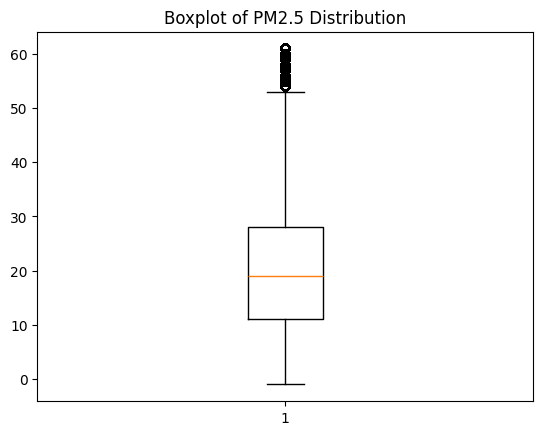

In [19]:
plt.boxplot(data["PM2.5"])
plt.title("Boxplot of PM2.5 Distribution")
plt.show()

In [20]:
data["Address"].nunique()

25

In [21]:
data["Address"].str.split(",",expand=True)

,0,1,2,3,4
0,19,Jong-ro 35ga-gil,Jongno-gu,Seoul,Republic of Korea
1,19,Jong-ro 35ga-gil,Jongno-gu,Seoul,Republic of Korea
2,19,Jong-ro 35ga-gil,Jongno-gu,Seoul,Republic of Korea
3,19,Jong-ro 35ga-gil,Jongno-gu,Seoul,Republic of Korea
4,19,Jong-ro 35ga-gil,Jongno-gu,Seoul,Republic of Korea
...,...,...,...,...,...
647506,59,Gucheonmyeon-ro 42-gil,Gangdong-gu,Seoul,Republic of Korea
647507,59,Gucheonmyeon-ro 42-gil,Gangdong-gu,Seoul,Republic of Korea
647508,59,Gucheonmyeon-ro 42-gil,Gangdong-gu,Seoul,Republic of Korea
647509,59,Gucheonmyeon-ro 42-gil,Gangdong-gu,Seoul,Republic of Korea


In [22]:
data.drop(columns = "Outlier", inplace = True)

In [23]:
data["District"] = data["Address"].str.split(",",expand=True)[2]

$$
\text{Trend Analysis}
$$

In [24]:
from datetime import datetime

In [25]:
data["Measurement date"] = pd.to_datetime(data["Measurement date"])

In [26]:
data["Year"] = data["Measurement date"].dt.year

Group by Year, and summarize to the mean of each Pollutant Gas

$$
\text{Visualize pollutant trends using Matplotlib.}
$$

In [27]:
new_group = data.groupby("Year")[["SO2","NO2","O3","CO","PM10","PM2.5"]].mean().reset_index()
new_group

,Year,SO2,NO2,O3,CO,PM10,PM2.5
0,2017,0.003205,0.027870,0.023104,0.517864,44.379726,22.160285
1,2018,-0.001097,0.023507,0.018097,0.494565,41.765160,19.914951
2,2019,-0.007751,0.015891,0.012498,0.515432,45.036843,20.477049


In [28]:
df_long = new_group.melt(
    id_vars="Year",
    var_name="Pollutant",
    value_name="Means"
)
df_long

,Year,Pollutant,Means
0,2017,SO2,0.003205
1,2018,SO2,-0.001097
2,2019,SO2,-0.007751
3,2017,NO2,0.027870
4,2018,NO2,0.023507
5,2019,NO2,0.015891
6,2017,O3,0.023104
7,2018,O3,0.018097
8,2019,O3,0.012498
9,2017,CO,0.517864


In [29]:
df_long["Pollutant"].unique()

array(['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5'], dtype=object)

In [30]:
!pip install --upgrade nbformat

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import plotly.io as pio
pio.renderers.default = "notebook_connected" 
# Or use "colab" if you are in Google Colab

In [32]:
df_long["Year"] = df_long["Year"].astype(str)
px.line(df_long,x="Year",y="Means",color="Pollutant",markers=True,title="Air Pollutants Trend by Year")

$$
Challenge: \\
\textbf{Compare pollution levels by region using groupby() and barcharts.}
$$

In [33]:
region_pol = data.groupby("District")[["SO2","NO2","O3","CO","PM10","PM2.5"]].mean().reset_index()

<Figure size 1500x1500 with 0 Axes>

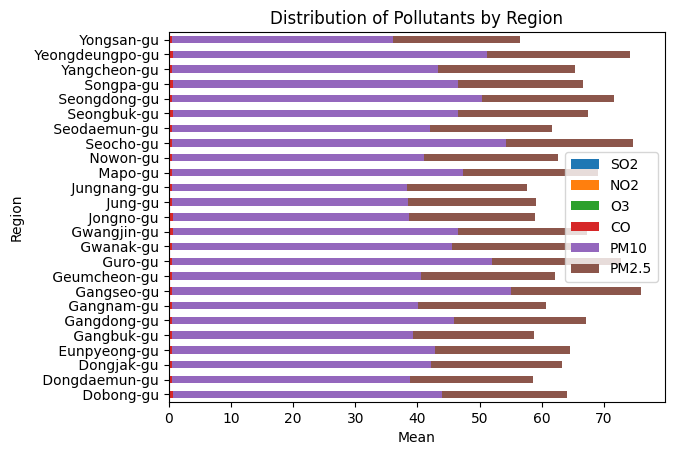

In [34]:
plt.figure(figsize=(15,15))
data.groupby("District")[["SO2","NO2","O3","CO","PM10","PM2.5"]].mean().plot(kind = "barh", stacked = True)
plt.title("Distribution of Pollutants by Region")
plt.xlabel("Mean")
plt.ylabel("Region")
plt.show()